In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plotting module
import seaborn as sns

In [ ]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***inspection of Data***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***Replacing blanks with 0***

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum().sum()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df["customerID"].duplicated().sum()

np.int64(0)

converted to Yes/no to make it easier to understand


In [ ]:
def conv(value):
  if value == 1:
    return 'Yes'
  else:
    return 'No'

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


***Analysis***

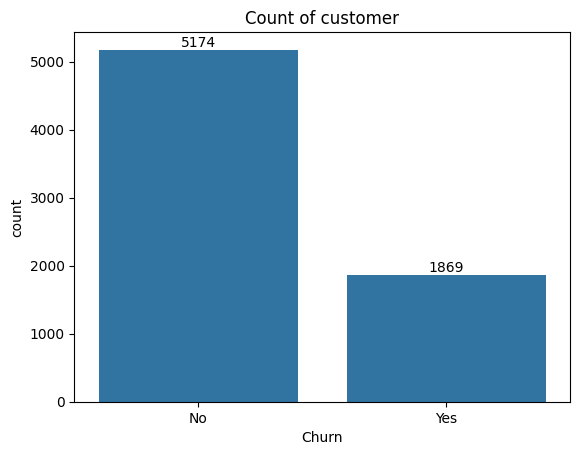

In [33]:
ax = sns.countplot(x ='Churn', data = df) #visualize count
ax.bar_label(ax.containers[0]) #show count also
plt.title("Count of customer")
plt.show()

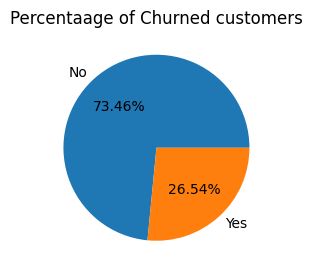

In [35]:
plt.figure(figsize=(3,4))
plt.title("Percentaage of Churned customers")
gp = df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gp['Churn'],labels = gp.index,autopct="%1.2f%%")
plt.show()

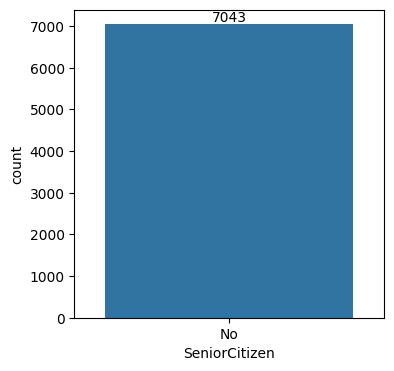

In [49]:
plt.figure(figsize =(4,4))
ax = sns.countplot(x = 'gender',data = df)
ax.bar_label(ax.containers[0])
plt.show()

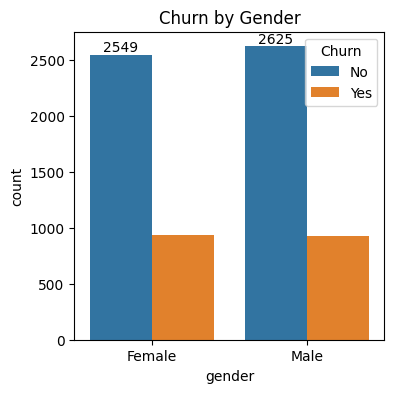

In [45]:
plt.figure(figsize =(4,4))
plt.title("Churn by Gender")
ax = sns.countplot(x = 'gender',data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

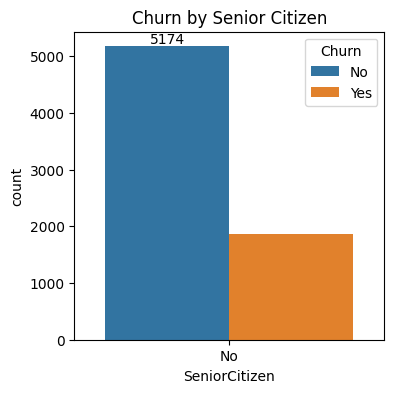

In [48]:
plt.figure(figsize =(4,4))
plt.title("Churn by Senior Citizen")
ax = sns.countplot(x = 'SeniorCitizen',data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

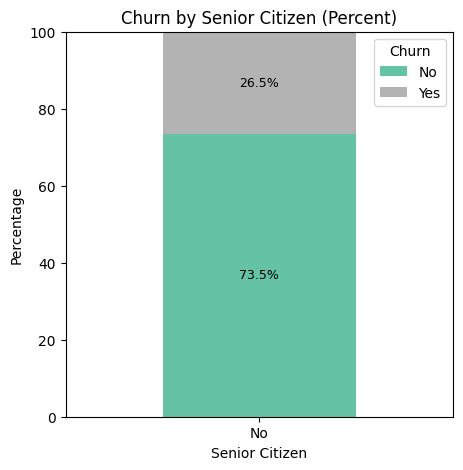

In [66]:
data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
gp = data.div(data.sum(axis=1), axis=0) * 100

# Plot
ax = gp.plot(kind='bar', stacked=True, figsize=(5,5), colormap='Set2')

# Add percentage labels
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=9)


# Titles and labels
plt.title("Churn by Senior Citizen (Percent)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.ylim(0, 100)
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

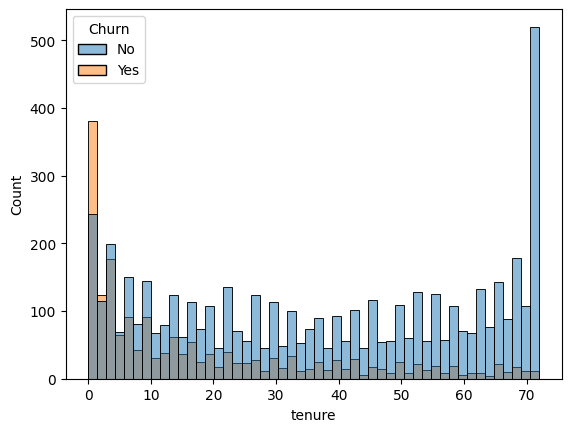

In [71]:
sns.histplot(x = 'tenure',data = df,bins = 50,hue = "Churn")

People who have used our services for a long time have stayed and people who have used our services for one or 2 months have churned

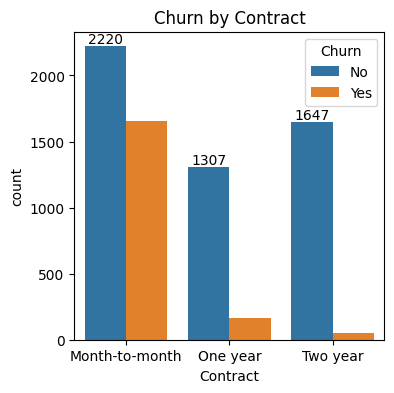

In [76]:
plt.figure(figsize =(4,4))
plt.title("Churn by Contract")
ax = sns.countplot(x = 'Contract',data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()


# people who have m-m contract are more likely to churn then from those who have 1 or 2 years of contract

In [78]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

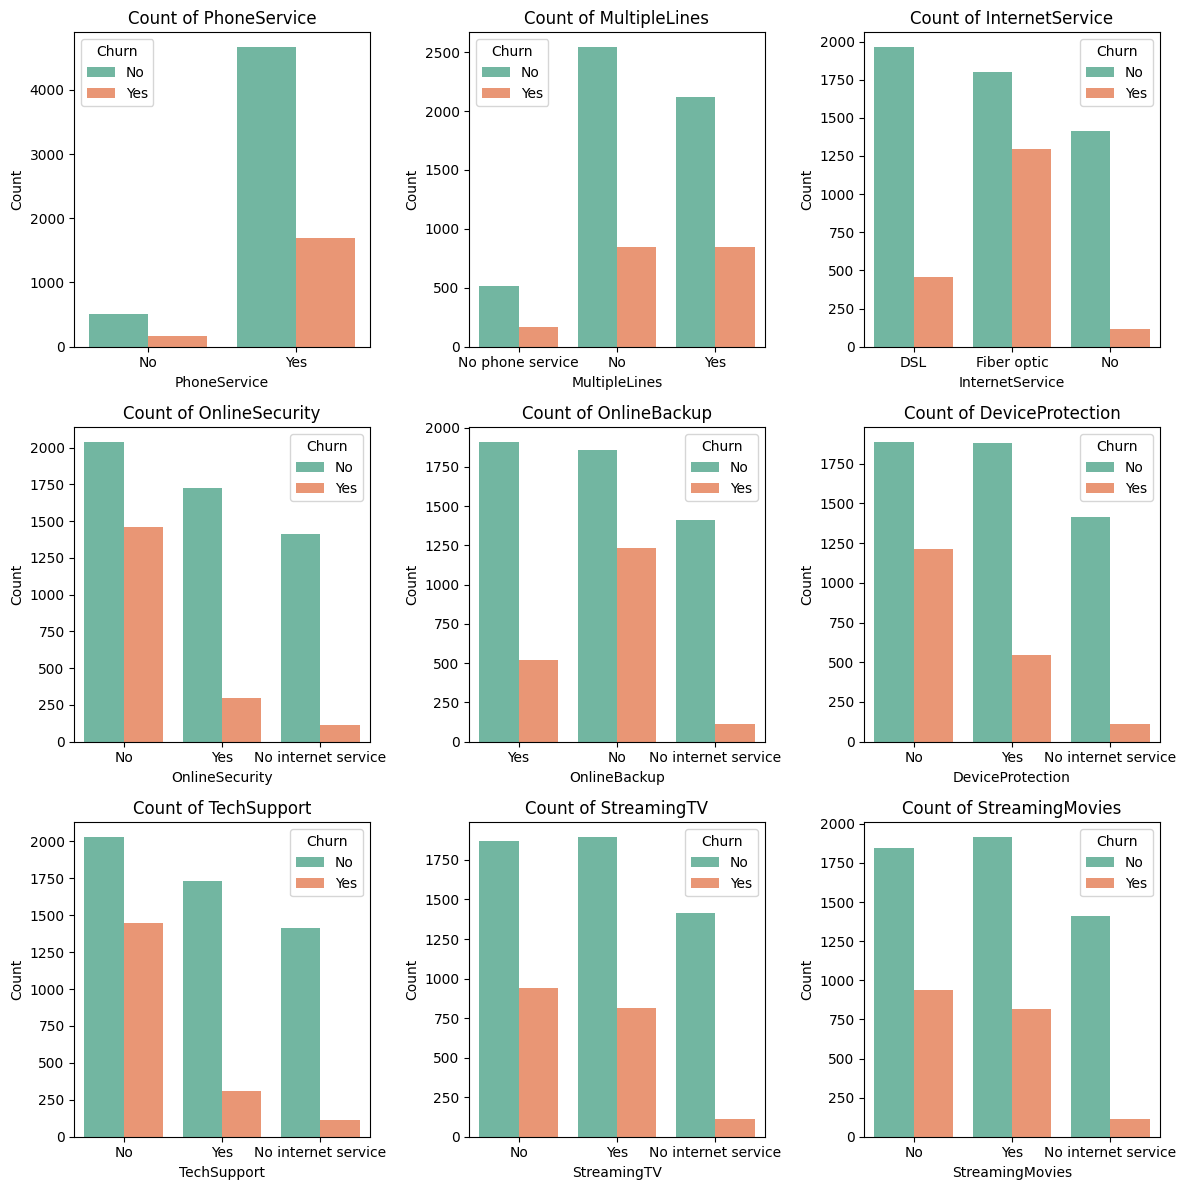

In [80]:
# List of columns you want to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
n_cols = 3  # Number of columns for subplots
n_rows = (len(columns) + n_cols - 1) // n_cols  # Number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a count plot for each column
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2',hue = 'Churn')
    axes[i].set_title(f"Count of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

# Remove any unused axes (if the grid has more plots than columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

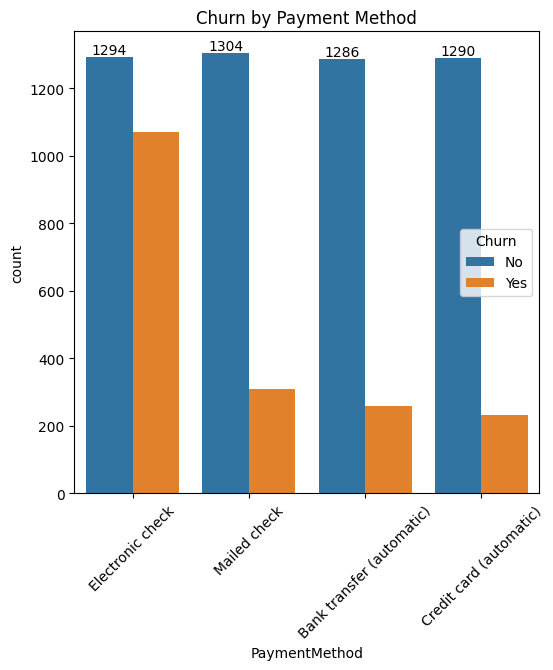

In [86]:
plt.figure(figsize =(6,6))
plt.title("Churn by Payment Method")
ax = sns.countplot(x = 'PaymentMethod',data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.show()


In [ ]:
#customer is likely to churn while he is using Electronic check as his payment method